In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import time
from math import exp

from scipy.stats import mode
%matplotlib inline
start_time = dt.datetime.now()

In [3]:
import warnings

#ignore by message
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

##part of the message is also okay
warnings.filterwarnings("ignore", message="divide by zero encountered") 
warnings.filterwarnings("ignore", message="invalid value encountered")

In [4]:
data = pd.read_csv('card transactions.csv')

In [5]:
data.shape

(96753, 18)

In [6]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
Unnamed: 10          float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Unnamed: 15          float64
Unnamed: 16          float64
Unnamed: 17          float64
dtype: object

In [7]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(how='all',axis=1,inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [9]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [10]:
data.tail()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0
96752,96753,5142243247,2010-12-31,9108347680006,STAPLES NATIONAL #471,NJ,7606.0,P,554.64,0


In [11]:
dict_value_counts = {}
for i in data.columns.to_list():
    dict_value_counts[i]=data[i].value_counts()

In [12]:
dict_value_counts

{'Recnum': 1        1
 64500    1
 64509    1
 64508    1
 64507    1
         ..
 32250    1
 32249    1
 32248    1
 32247    1
 96753    1
 Name: Recnum, Length: 96753, dtype: int64,
 'Cardnum': 5142148452    1192
 5142184598     921
 5142189108     663
 5142297710     583
 5142223373     579
               ... 
 5142306704       1
 5142135021       1
 5142276358       1
 5142142008       1
 5142233066       1
 Name: Cardnum, Length: 1645, dtype: int64,
 'Date': 2010-02-28    684
 2010-08-10    610
 2010-03-15    594
 2010-09-13    564
 2010-09-07    536
              ... 
 2010-11-07     11
 2010-10-03     10
 2010-01-16      9
 2010-10-17      6
 2010-12-26      6
 Name: Date, Length: 365, dtype: int64,
 'Merchnum': 930090121224     9310
 5509006296254    2131
 9900020006406    1714
 602608969534     1092
 4353000719908    1020
                  ... 
 2000021670061       1
 6731000199309       1
 9813800006594       1
 3065107420906       1
 3500000006160       1
 Name: Merchnum, 

In [13]:
dict_unique = {}
for i in data.columns.to_list():
    dict_unique[i]=len(data[i].unique())
dict_unique

{'Recnum': 96753,
 'Cardnum': 1645,
 'Date': 365,
 'Merchnum': 13092,
 'Merch description': 13126,
 'Merch state': 228,
 'Merch zip': 4568,
 'Transtype': 4,
 'Amount': 34909,
 'Fraud': 2}

In [14]:
dict_len = {}
for i in data.columns.to_list():
    dict_len[i]=data[i].isnull().count()
dict_len

{'Recnum': 96753,
 'Cardnum': 96753,
 'Date': 96753,
 'Merchnum': 96753,
 'Merch description': 96753,
 'Merch state': 96753,
 'Merch zip': 96753,
 'Transtype': 96753,
 'Amount': 96753,
 'Fraud': 96753}

In [15]:
dict_populated = {}
for i in data.columns.to_list():
    dict_populated[i] = data[i].count()/len(data)*100
dict_populated

{'Recnum': 100.0,
 'Cardnum': 100.0,
 'Date': 100.0,
 'Merchnum': 96.51173607019938,
 'Merch description': 100.0,
 'Merch state': 98.76489617892985,
 'Merch zip': 95.1877461163995,
 'Transtype': 100.0,
 'Amount': 100.0,
 'Fraud': 100.0}

In [16]:
dict_empty = {}
for i in data.columns.to_list():
    dict_empty[i] = pd.isna(data[i]).value_counts()
dict_empty = pd.DataFrame(dict_empty)
dict_empty

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
False,96753.0,96753.0,96753.0,93378,96753.0,95558,92097,96753.0,96753.0,96753.0
True,NaN,NaN,NaN,3375,NaN,1195,4656,NaN,NaN,NaN


In [17]:
data2= data.loc[:, data.dtypes == object]
data2.describe()

,Merchnum,Merch description,Merch state,Transtype
count,93378,96753,95558,96753
unique,13091,13126,227,4
top,930090121224,GSA-FSS-ADV,TN,P
freq,9310,1688,12035,96398


In [18]:
data3= data.loc[:, data.dtypes != object]
data3.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


# Keeping only 'P' Transtype

In [19]:
data = data.loc[data['Transtype'] == 'P']
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


# Removed single amount outlier

In [20]:
data['Amount'].max()

3102045.53

In [21]:
data = data.loc[data['Amount'] < 3102045.53 ]

In [22]:
data['Amount'].max()

47900.0

# Impute and clean Merch state 

First step: Matched Merch state values with zip code by creating a dictionary

In [23]:
zip_codes = pd.read_csv('uszips.csv')
zip_codes.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [24]:
zip_codes['zip_new'] = zip_codes.zip.astype('float64')
data['Merch state'].isnull().sum()

1020

In [25]:
zip_dict = {zip_code: state_id for zip_code, state_id in zip(zip_codes.zip_new.values, zip_codes.state_id.values)}
zip_dict

{601.0: 'PR',
 602.0: 'PR',
 603.0: 'PR',
 606.0: 'PR',
 610.0: 'PR',
 611.0: 'PR',
 612.0: 'PR',
 616.0: 'PR',
 617.0: 'PR',
 622.0: 'PR',
 623.0: 'PR',
 624.0: 'PR',
 627.0: 'PR',
 631.0: 'PR',
 636.0: 'PR',
 637.0: 'PR',
 638.0: 'PR',
 641.0: 'PR',
 646.0: 'PR',
 647.0: 'PR',
 650.0: 'PR',
 652.0: 'PR',
 653.0: 'PR',
 656.0: 'PR',
 659.0: 'PR',
 660.0: 'PR',
 662.0: 'PR',
 664.0: 'PR',
 667.0: 'PR',
 669.0: 'PR',
 670.0: 'PR',
 674.0: 'PR',
 676.0: 'PR',
 677.0: 'PR',
 678.0: 'PR',
 680.0: 'PR',
 682.0: 'PR',
 683.0: 'PR',
 685.0: 'PR',
 687.0: 'PR',
 688.0: 'PR',
 690.0: 'PR',
 692.0: 'PR',
 693.0: 'PR',
 694.0: 'PR',
 698.0: 'PR',
 703.0: 'PR',
 704.0: 'PR',
 705.0: 'PR',
 707.0: 'PR',
 714.0: 'PR',
 715.0: 'PR',
 716.0: 'PR',
 717.0: 'PR',
 718.0: 'PR',
 719.0: 'PR',
 720.0: 'PR',
 723.0: 'PR',
 725.0: 'PR',
 727.0: 'PR',
 728.0: 'PR',
 729.0: 'PR',
 730.0: 'PR',
 731.0: 'PR',
 735.0: 'PR',
 736.0: 'PR',
 738.0: 'PR',
 739.0: 'PR',
 740.0: 'PR',
 741.0: 'PR',
 745.0: 'PR',
 751.0

In [26]:
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_dict))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/3295074367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_dict))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [27]:
data['Merch state'].isnull().sum()

980

# Second step: Filled Merch state values by creating a dictionary  of Merchnum and mode value of Merch state

In [28]:
from scipy.stats import mode
result = data.groupby('Merchnum')['Merch state'].apply(mode).reset_index()
result['Merch state'] = result['Merch state'].apply(lambda x: x.mode[0])
result = pd.concat([result['Merchnum'], result['Merch state']], axis=1)
result

,Merchnum,Merch state
0,0,MI
1,003100006NOT6,KY
2,004740006ABC6,WY
3,005590006PNB6,CO
4,014430619 14,CA
...,...,...
13085,999968888330,FL
13086,DU49038320006,PA
13087,JCPENNE9 CO,MD
13088,PENNE9 CO #05,OH


In [29]:
area_dict = dict(zip(result['Merchnum'],result['Merch state']))
area_dict

{'0': 'MI',
 '003100006NOT6': 'KY',
 '004740006ABC6': 'WY',
 '005590006PNB6': 'CO',
 '014430619  14': 'CA',
 '014938913  51': 'UT',
 '014948837  52': 'CA',
 '014988879  18': 'SC',
 '016560006NOT0': 'NJ',
 '017670006NOT0': 'MD',
 '018252152  57': 'NE',
 '018990006NOT0': 'OR',
 '020130006EDU0': 'GA',
 '025950005PSS6': 'NC',
 '028450006NOT0': 'DC',
 '028600006NOT0': 'MI',
 '032630006NOT0': 'NC',
 '035390089PSS0': 'NC',
 '035390089PSS6': 'NC',
 '039320006APC0': 'MD',
 '039320006APC6': 'MD',
 '044140006ALB0': 'LA',
 '044140006ALB6': 'LA',
 '047010006ABC0': 'FL',
 '047070006NOT6': 'PA',
 '05-0500900356': 'GA',
 '05-0506005800': 'AR',
 '05-0506006216': 'FL',
 '05-0508900712': 'NV',
 '05-0509000800': 'OH',
 '05-0509106367': 'PA',
 '05-0509108956': 'PA',
 '05-0509502232': 'PA',
 '05-0509909083': 'KY',
 '050540006NOT6': 'GA',
 '06-0004269242': 'IL',
 '06-0006692427': 'OH',
 '06-0006692593': 'GA',
 '06-0060735515': 'CO',
 '06-0060738311': 'CO',
 '06-0060917849': 'TX',
 '06-3508298980': 'IL',
 '06

In [30]:
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(area_dict))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/850231905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(area_dict))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [31]:
data['Merch state'].isnull().sum()

889

# Third step : Filled Merch state values by creating a dictionary of Merchnum and mode value of Merch state

In [32]:
import pandas as pd
from statistics import mode

# Group the data by Merch description and apply the mode function to the Merch state column
Merchdesc_Merchstate = data.groupby('Merch description')['Merch state'].apply(mode).reset_index()

# Extract the mode value from the result of the mode function
Merchdesc_Merchstate['Merch state'] = Merchdesc_Merchstate['Merch state'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Create a new DataFrame that includes only the Merch description and mode Merch state columns
Merchdesc_Merchstate = Merchdesc_Merchstate[['Merch description', 'Merch state']]

# Print the resulting DataFrame
print(Merchdesc_Merchstate)


              Merch description Merch state
0                   #9 SOFTWARE          VA
1          (ISC)2 CERTIFICATION          MA
2        0000000000000000000000          WA
3                033007 KINKO'S          NC
4                05032 FLYING J          NM
...                         ...         ...
12961        ZYMARK CORPORATION          MA
12962    ZYMAX ENVIROTECHNOLOGY          CA
12963        ZYMED LABORATORIES          CA
12964        ZZYZX WORKSTATIONS          CA
12965  ZZYZX WRKSTNS PERIPHERAL          CA

[12966 rows x 2 columns]


In [33]:
Merchdesc_Merchstate_dict = dict(zip(Merchdesc_Merchstate['Merch description'],Merchdesc_Merchstate['Merch state']))
Merchdesc_Merchstate_dict

{'#9 SOFTWARE': 'VA',
 '(ISC)2 CERTIFICATION': 'MA',
 '0000000000000000000000': 'WA',
 "033007 KINKO'S": 'NC',
 '05032 FLYING J': 'NM',
 "072001 KINKO'S": 'CA',
 '079001 KINKOS OLYMPIA': 'WA',
 '1 HOUR MOTO PHOTO': 'DC',
 '1 ST COMPU CHOICE': 'OH',
 '1-800 MOBILES': 'NY',
 '1-800-HITCH-IT': 'PA',
 '1-ON-1/WORKING SMARTER': 'IL',
 '1000 FRIENDS OF OREGON': 'OR',
 '101 HITCH & RENTAL': 'KS',
 '1010 NET.COM CORP': 'NJ',
 '103 PRINTS PLUS': 'VA',
 '123 COMPUTER SUPPLIES INC': 'KS',
 '1ST VOICE': 'CA',
 '2 FOR 1 INKJET COM': 'CA',
 '20TH CENTURY PLASTICS': 'CA',
 '21ST CENTURY EXPO. GROUP': 'MD',
 '3-D MARKETING': 'NY',
 '365USA / XIT, INC.': 'CA',
 '3A MARINE SERVICE INC': 'MA',
 '3COM   *CORPORATION': 'CA',
 '3D COMPUTER AND GAMING IN': 'VA',
 '3M-PRODUCTS': 'MN',
 '42ND STREET PHOTO': 'NY',
 '46130 US DIST COURT': 'CO',
 '7 CORNER/TOOLS ON SALE': 'MN',
 '7 CORNERS ACE HARDWARE': 'MN',
 '800-231-5820 SS *PORT. PR': 'CT',
 '800-INSIGHT': 'AZ',
 '800.COM': 'OR',
 '8886538103 PREFBUYERRE': '

In [34]:
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(Merchdesc_Merchstate_dict))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/1027212975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(Merchdesc_Merchstate_dict))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [35]:
data['Merch state'].isnull().sum()

886

# FOURTH STEP: FILL THE MERCH STATE BASED ON THE CARD NUM
    by creating a dictionary of card num and merch state

In [36]:
#from scipy.stats import mode
#Cardnum_Merchstate = data.groupby('Cardnum')['Merch state'].apply(mode).reset_index()
#Cardnum_Merchstate['Merch state'] = Cardnum_Merchstate['Merch state'].apply(lambda x: x.mode[0])
#Cardnum_Merchstate

In [37]:
import pandas as pd
from statistics import mode

# Group the data by Merch description and apply the mode function to the Merch state column
Cardnum_Merchstate = data.groupby('Cardnum')['Merch state'].apply(mode).reset_index()

# Extract the mode value from the result of the mode function
Cardnum_Merchstate['Merch state'] = Cardnum_Merchstate['Merch state'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Create a new DataFrame that includes only the Merch description and mode Merch state columns
Cardnum_Merchstate = Cardnum_Merchstate[['Cardnum', 'Merch state']]

# Print the resulting DataFrame
print(Cardnum_Merchstate)

         Cardnum Merch state
0     5142110002          VA
1     5142110081         NaN
2     5142110313         NaN
3     5142110402         NaN
4     5142110434          IN
...          ...         ...
1638  5142310397         NaN
1639  5142310525         NaN
1640  5142310598          TX
1641  5142310768         NaN
1642  5142847398          TN

[1643 rows x 2 columns]


In [38]:
Cardnum_Merchstate_dict = dict(zip(Cardnum_Merchstate['Cardnum'],Cardnum_Merchstate['Merch state']))
Cardnum_Merchstate_dict

{5142110002: 'VA',
 5142110081: nan,
 5142110313: nan,
 5142110402: nan,
 5142110434: 'IN',
 5142110651: nan,
 5142110691: nan,
 5142110749: 'NJ',
 5142110909: 'RI',
 5142111097: 'AL',
 5142111125: 'GA',
 5142111372: 'AL',
 5142111572: 'AK',
 5142111587: 'GA',
 5142111703: 'AL',
 5142111930: 'AL',
 5142112110: 'AL',
 5142112347: 'GA',
 5142112444: 'CA',
 5142112551: 'PA',
 5142112611: 'PA',
 5142112805: 'PA',
 5142112822: 'PA',
 5142112858: 'GA',
 5142112936: 'CA',
 5142113016: 'CA',
 5142113088: 'PA',
 5142113162: 'PA',
 5142113192: 'CA',
 5142113193: 'CA',
 5142113198: 'CA',
 5142113241: 'IL',
 5142113401: 'CA',
 5142113581: 'CA',
 5142113694: 'CA',
 5142113831: 'CA',
 5142113833: 'CA',
 5142114004: 'CA',
 5142114073: 'CA',
 5142114102: 'UT',
 5142114291: 'CA',
 5142114425: 'TX',
 5142114460: 'CA',
 5142114524: 'CA',
 5142114525: 'CA',
 5142114644: 'NY',
 5142114753: 'CA',
 5142114913: 'CA',
 5142115062: 'WA',
 5142115239: 'NJ',
 5142115452: 'CA',
 5142115571: 'CA',
 5142115580: 'CA'

In [39]:
data['Merch state'] = data['Merch state'].fillna(data['Cardnum'].map(Cardnum_Merchstate_dict))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/25913677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Cardnum'].map(Cardnum_Merchstate_dict))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [40]:
data['Merch state'].isnull().sum()

120

# Impute and clean ZIP CODE

First step: creating a dictionary with merch state and mode values of zip code

In [41]:
data['Merch zip'].isnull().sum()

4300

In [42]:
import pandas as pd
from statistics import mode

# Group the data by Merch state and apply the mode function to the Merch zip column
Merchstate_zip = data.groupby('Merch state')['Merch zip'].apply(lambda x: mode(x) if len(x) > 0 else None).reset_index()

# Rename the columns to match the expected output
Merchstate_zip = Merchstate_zip.rename(columns={'Merch state': 'Merch state', 'Merch zip': 'Merch zip'})

# Print the resulting DataFrame
print(Merchstate_zip)

   Merch state  Merch zip
0            0      936.0
1           AB        NaN
2           AK    99501.0
3           AL    35801.0
4           AR    72764.0
..         ...        ...
56          VT     5146.0
57          WA    98101.0
58          WI    53546.0
59          WV    26003.0
60          WY    82070.0

[61 rows x 2 columns]


In [43]:
Merchstate_zip_dict = dict(zip(Merchstate_zip['Merch state'],Merchstate_zip['Merch zip']))
Merchstate_zip_dict

{0: 936.0,
 'AB': nan,
 'AK': 99501.0,
 'AL': 35801.0,
 'AR': 72764.0,
 'AZ': 85285.0,
 'BC': nan,
 'CA': 92656.0,
 'CO': 80202.0,
 'CT': 6907.0,
 'DC': 20005.0,
 'DE': 19713.0,
 'FL': 33716.0,
 'GA': 30091.0,
 'HI': 96813.0,
 'IA': 50309.0,
 'ID': 83642.0,
 'IL': 60061.0,
 'IN': 46250.0,
 'KS': 66202.0,
 'KY': 40511.0,
 'LA': 70148.0,
 'MA': 1730.0,
 'MB': nan,
 'MD': 20763.0,
 'ME': 4032.0,
 'MI': 49423.0,
 'MN': 55164.0,
 'MO': 63103.0,
 'MS': 39201.0,
 'MT': 59601.0,
 'NC': 27707.0,
 'ND': 20740.0,
 'NE': 69162.0,
 'NH': 97213.0,
 'NJ': 8701.0,
 'NM': 87109.0,
 'NS': nan,
 'NV': 89119.0,
 'NY': 10011.0,
 'OH': 45237.0,
 'OK': 74820.0,
 'ON': nan,
 'OR': 97330.0,
 'PA': 17201.0,
 'PQ': nan,
 'PR': 934.0,
 'QC': nan,
 'RI': 2852.0,
 'SC': 29464.0,
 'SD': 57049.0,
 'TN': 38118.0,
 'TX': 78682.0,
 'US': nan,
 'UT': 84119.0,
 'VA': 22202.0,
 'VT': 5146.0,
 'WA': 98101.0,
 'WI': 53546.0,
 'WV': 26003.0,
 'WY': 82070.0}

In [44]:
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(Merchstate_zip_dict))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/292100861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(Merchstate_zip_dict))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [45]:
data['Merch zip'].isnull().sum()

4300

In [46]:
merchdes_merchzip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchzip :
        merchdes_merchzip[merchdes] = data.loc[index, 'Merch zip']
merchdes_merchzip

{'FEDEX SHP 12/23/09 AB#': 38118.0,
 'SERVICE MERCHANDISE #81': 1803.0,
 'OFFICE DEPOT #191': 20706.0,
 'FEDEX SHP 12/28/09 AB#': 38118.0,
 'FEDEX SHP 12/22/09 AB#': 38118.0,
 'MIAMI COMPUTER SUPPLY': 45429.0,
 'FISHER SCI ATL': 30091.0,
 'FEDEX SHP 12/21/09 AB#': 38118.0,
 'CDW*GOVERNMENT INC': 60061.0,
 'FISHER SCI HUS': 77251.0,
 'AMAZON.COM  *SUPERSTRE': 98101.0,
 'FEDEX SHP 12/14/09 AB#': 38118.0,
 'DIRKS PLUMBING/HEATING REPAIRS': 38118.0,
 'COM*COMARK GVT ED SALE': 60108.0,
 'FISHER SCI DAL': 75080.0,
 'PTK*PUBLISH PERFECTION': 53052.0,
 'FEDEX SHP 12/27/09 AB#': 38118.0,
 'MWI*DATA COM': 8701.0,
 'FISHER SCI CHI': 60143.0,
 'FERGUSON ENTERPRISES I': 32514.0,
 'IBM INTERNET  01000025': nan,
 'HEWLETT PACKARD CO': 95747.0,
 'MTT*SKYTEL': 39201.0,
 'RADIO SHACK   00187278': 30329.0,
 'SOCIETY OF TOXICOLOGY': 20190.0,
 'DELL MARKETING L.P.': 78682.0,
 'OFFICE DEPOT #154': 30336.0,
 'TARGET        00000876': 76051.0,
 'GSA-FSS-ADV': 22202.0,
 'U S TECHNOLOGIES': 63026.0,
 'STAPLES #

In [47]:
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_merchzip))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/4061083500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_merchzip))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [48]:
data['Merch zip'].isnull().sum()

2663

In [49]:
dict_empty = {}
for i in data.columns.to_list():
    dict_empty[i] = pd.isna(data[i]).value_counts()
dict_empty = pd.DataFrame(dict_empty)
dict_empty

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
False,96397.0,96397.0,96397.0,93199,96397.0,96277,93734,96397.0,96397.0,96397.0
True,NaN,NaN,NaN,3198,NaN,120,2663,NaN,NaN,NaN


step 2:  creating dictionary of merchant number and merch state

In [50]:
merchnum_merchzip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_merchzip :
        merchnum_merchzip[merchnum] = data.loc[index, 'Merch zip']
merchnum_merchzip

{'5509006296254': 38118.0,
 '61003026333': 1803.0,
 '4503082993600': 20706.0,
 '6098208200062': 45429.0,
 '602608969534': 30091.0,
 '5725000466504': 60061.0,
 '602608969284': 77251.0,
 '4353000719908': 98101.0,
 '4503738417400': 38118.0,
 '7234000681204': 60108.0,
 '602608969739': 75080.0,
 '3443000643641': 53052.0,
 '9765000409955': 8701.0,
 '602608969138': 60143.0,
 '602608038586': 32514.0,
 '5000006000095': nan,
 '9050153': 95747.0,
 '3397000747409': 39201.0,
 '4800000627972': 30329.0,
 '991808369338': 20190.0,
 '4591200814444': 78682.0,
 '4503082638300': 30336.0,
 '3600000000271': 76051.0,
 '9900020006406': 22202.0,
 '316443184': 63026.0,
 '9108234610006': 17201.0,
 '700547969': 94954.0,
 '9108234610000': 17201.0,
 '4910002260006': 27560.0,
 '8053478940091': nan,
 '881178615': 7960.0,
 '7965600643306': 6513.0,
 '8915600680068': 30174.0,
 '657614590333': 75220.0,
 '600000201284': 15222.0,
 '6887100601812': 66202.0,
 '4503042673100': 30326.0,
 '6003080112870': 97015.0,
 '899900007965

In [51]:
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_merchzip))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/618414345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_merchzip))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [52]:
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip [merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip [merchdes] = data.loc[index, 'Merch zip']

# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')


/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/1664940846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/1664940846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))
/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/1664940846.py:16: 

In [53]:
data['Merch zip'].isnull().sum()

2658

In [54]:
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = data.loc[index, 'Merch state']
        
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state [merchnum] = data.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state [merchdes] = data.loc[index, 'Merch state']


In [55]:
# fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')


/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/2930717460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/2930717460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/2930717460.py:4: Sett

In [56]:
data['Merch state'].isnull().sum()

44

# Impute and clean Merch num 

In [57]:
data['Merchnum'].isnull().sum()

3198

In [58]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum :
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']
merchdes_merchnum

{'FEDEX SHP 12/23/09 AB#': '5509006296254',
 'SERVICE MERCHANDISE #81': '61003026333',
 'OFFICE DEPOT #191': '4503082993600',
 'FEDEX SHP 12/28/09 AB#': '5509006296254',
 'FEDEX SHP 12/22/09 AB#': '5509006296254',
 'MIAMI COMPUTER SUPPLY': '6098208200062',
 'FISHER SCI ATL': '602608969534',
 'FEDEX SHP 12/21/09 AB#': '5509006296254',
 'CDW*GOVERNMENT INC': '5725000466504',
 'FISHER SCI HUS': '602608969284',
 'AMAZON.COM  *SUPERSTRE': '4353000719908',
 'FEDEX SHP 12/14/09 AB#': '5509006296254',
 'DIRKS PLUMBING/HEATING REPAIRS': '4503738417400',
 'COM*COMARK GVT ED SALE': '7234000681204',
 'FISHER SCI DAL': '602608969739',
 'PTK*PUBLISH PERFECTION': '3443000643641',
 'FEDEX SHP 12/27/09 AB#': '5509006296254',
 'MWI*DATA COM': '9765000409955',
 'FISHER SCI CHI': '602608969138',
 'FERGUSON ENTERPRISES I': '602608038586',
 'IBM INTERNET  01000025': '5000006000095',
 'HEWLETT PACKARD CO': '9050153',
 'MTT*SKYTEL': '3397000747409',
 'RADIO SHACK   00187278': '4800000627972',
 'SOCIETY OF TOX

In [59]:
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/3823056122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [60]:
data['Merchnum'].isnull().sum()

2906

# Step 2: Creating dictionary of Merch num and Merch zip

In [61]:
merchzip_merchnum = {}
for index, merchzip in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if merchzip not in merchzip_merchnum :
        merchzip_merchnum[merchzip] = data.loc[index, 'Merchnum']
merchzip_merchnum

{38118.0: '5509006296254',
 1803.0: '61003026333',
 20706.0: '4503082993600',
 45429.0: '6098208200062',
 30091.0: '602608969534',
 60061.0: '5725000466504',
 77251.0: '602608969284',
 98101.0: '4353000719908',
 60108.0: '7234000681204',
 75080.0: '602608969739',
 53052.0: '3443000643641',
 8701.0: '9765000409955',
 60143.0: '602608969138',
 32514.0: '602608038586',
 95747.0: '9050153',
 39201.0: '3397000747409',
 30329.0: '4800000627972',
 20190.0: '991808369338',
 78682.0: '4591200814444',
 30336.0: '4503082638300',
 76051.0: '3600000000271',
 22202.0: '9900020006406',
 63026.0: '316443184',
 17201.0: '9108234610006',
 94954.0: '700547969',
 27560.0: '4910002260006',
 7960.0: '881178615',
 6513.0: '7965600643306',
 30174.0: '8915600680068',
 75220.0: '657614590333',
 15222.0: '600000201284',
 66202.0: '6887100601812',
 30326.0: '4503042673100',
 97015.0: '6003080112870',
 94583.0: '8999000079657',
 64120.0: '7284500097374',
 22151.0: '7593980000761',
 27707.0: '4503082616100',
 7470.

In [62]:
data['Merchnum'] = data['Merchnum'].fillna(data['Merch zip'].map(merchzip_merchnum))
data

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/1675732065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].fillna(data['Merch zip'].map(merchzip_merchnum))


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [63]:
data['Merchnum'].isnull().sum()

2172

In [64]:
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/3816250122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
/var/folders/dp/mx7sx6tn68j89m724gk8n7000000gn/T/ipykernel_74172/3816250122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')


In [65]:
data['Merchnum'].isnull().sum()

1486

In [66]:
# fill the rest with unknown
data = data.fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 10.1+ MB


In [67]:
dict_empty = {}
for i in data.columns.to_list():
    dict_empty[i] = pd.isna(data[i]).value_counts()
dict_empty = pd.DataFrame(dict_empty)
dict_empty

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
False,96397,96397,96397,96397,96397,96397,96397,96397,96397,96397


# Benford's Law Variable

In [68]:
bf= data.copy()

In [69]:
bf.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [70]:
bf['amount_100']=(bf['Amount']*100).astype(str)
bf['first_digit'] = bf['amount_100'].str[0]
dropfedex= bf[bf['Merch description'].str.contains('FEDEX')]
droplist=dropfedex.index.tolist()
bf1=bf.drop(droplist)
bf1['bin']=bf1['first_digit'].apply(lambda x: "low" if x=="1" else ("low" if x==2 else "high")) 

In [71]:
bf1.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,amount_100,first_digit,bin
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,3142.0,3,high
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,17849.0,1,low
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,23032.0,2,high
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,6211.0,6,high
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0,10689.0,1,low


In [72]:
bf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84622 entries, 1 to 96752
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             84622 non-null  int64         
 1   Cardnum            84622 non-null  int64         
 2   Date               84622 non-null  datetime64[ns]
 3   Merchnum           84622 non-null  object        
 4   Merch description  84622 non-null  object        
 5   Merch state        84622 non-null  object        
 6   Merch zip          84622 non-null  object        
 7   Transtype          84622 non-null  object        
 8   Amount             84622 non-null  float64       
 9   Fraud              84622 non-null  int64         
 10  amount_100         84622 non-null  object        
 11  first_digit        84622 non-null  object        
 12  bin                84622 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory 

In [73]:
card_bf=bf1.groupby(['Cardnum','bin']).agg({'bin' : ['count']}).reset_index()
card_bf.columns=['Cardnum','bin','count']
card_bf= card_bf.pivot_table(index='Cardnum',columns='bin',values='count',aggfunc='sum').reset_index()
card_bf.columns=['Cardnum','n_high','n_low']
card_bf=card_bf.fillna(1)

In [74]:
card_bf.head()

,Cardnum,n_high,n_low
0,5142110002,1.0,1.0
1,5142110081,4.0,1.0
2,5142110313,1.0,2.0
3,5142110402,10.0,1.0
4,5142110434,1.0,1.0


In [75]:
# calculating R, 1/R , U n, t, U_smoothed
c=3
n_mid=15
card_bf['R']=(1.096 * card_bf['n_low']/card_bf['n_high'])
card_bf['1/R']=(1/card_bf['R'])
card_bf['U']=list(map(lambda x, y : max(x,y),card_bf['R'],card_bf['1/R']))
card_bf['n']=card_bf['n_high'] + card_bf['n_low']
card_bf['t']=((card_bf['n']-n_mid)/c)

card_bf['U_smoothed']=list(map(lambda x,y : (1+ (x-1)/(1 + exp(-y))),card_bf['U'],card_bf['t']))
card_bf['U_smoothed']=card_bf['U_smoothed']

In [76]:
card_bf.head()

,Cardnum,n_high,n_low,R,1/R,U,n,t,U_smoothed
0,5142110002,1.0,1.0,1.0960,0.912409,1.096000,2.0,-4.333333,1.001244
1,5142110081,4.0,1.0,0.2740,3.649635,3.649635,5.0,-3.333333,1.091267
2,5142110313,1.0,2.0,2.1920,0.456204,2.192000,3.0,-4.000000,1.021440
3,5142110402,10.0,1.0,0.1096,9.124088,9.124088,11.0,-1.333333,2.694754
4,5142110434,1.0,1.0,1.0960,0.912409,1.096000,2.0,-4.333333,1.001244


In [77]:
bf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84622 entries, 1 to 96752
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             84622 non-null  int64         
 1   Cardnum            84622 non-null  int64         
 2   Date               84622 non-null  datetime64[ns]
 3   Merchnum           84622 non-null  object        
 4   Merch description  84622 non-null  object        
 5   Merch state        84622 non-null  object        
 6   Merch zip          84622 non-null  object        
 7   Transtype          84622 non-null  object        
 8   Amount             84622 non-null  float64       
 9   Fraud              84622 non-null  int64         
 10  amount_100         84622 non-null  object        
 11  first_digit        84622 non-null  object        
 12  bin                84622 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory 

In [78]:
merch_bf=bf1.groupby(['Merchnum','bin']).agg({'bin' : ['count']}).reset_index()
merch_bf.columns=['Merchnum','bin','count']
merch_bf= merch_bf.pivot_table(index='Merchnum',columns='bin',values= 'count',aggfunc='sum').reset_index()
merch_bf.columns=['Merchnum','n_high','n_low']
merch_bf=merch_bf.fillna(1)

In [79]:
merch_bf.head()

,Merchnum,n_high,n_low
0,0,34.0,22.0
1,003100006NOT6,1.0,1.0
2,004740006ABC6,1.0,1.0
3,005590006PNB6,1.0,1.0
4,014430619 14,1.0,1.0


In [80]:
# calculating R, 1/R , U n, t, U_smoothed
c=3
n_mid=15
merch_bf['R']=(1.096 * merch_bf['n_low']/merch_bf['n_high'])
merch_bf['1/R']=(1/merch_bf['R'])
merch_bf['U']=list(map(lambda x, y : max(x,y),merch_bf['R'],merch_bf['1/R']))
merch_bf['n']=merch_bf['n_high'] + merch_bf['n_low']
merch_bf['t']=((merch_bf['n']-n_mid)/c)

merch_bf['U_smoothed']=list(map(lambda x,y : (1+ (x-1)/(1 + exp(-y))),merch_bf['U'],merch_bf['t']))
merch_bf['U_smoothed']=merch_bf['U_smoothed']

In [81]:
merch_bf.head()

,Merchnum,n_high,n_low,R,1/R,U,n,t,U_smoothed
0,0,34.0,22.0,0.709176,1.410086,1.410086,56.0,13.666667,1.410086
1,003100006NOT6,1.0,1.0,1.096000,0.912409,1.096000,2.0,-4.333333,1.001244
2,004740006ABC6,1.0,1.0,1.096000,0.912409,1.096000,2.0,-4.333333,1.001244
3,005590006PNB6,1.0,1.0,1.096000,0.912409,1.096000,2.0,-4.333333,1.001244
4,014430619 14,1.0,1.0,1.096000,0.912409,1.096000,2.0,-4.333333,1.001244


In [82]:
card_bf['Cardnum']=card_bf['Cardnum'].apply(str)

In [83]:
card_bf.set_index('Cardnum',inplace =True)
card_Ustar=pd.DataFrame(card_bf['U_smoothed'])
card_Ustar.sort_values(['U_smoothed'],ascending=False).head(3)

,U_smoothed
Cardnum,
5142194617,33.743794
5142240823,22.266612
5142176413,14.740518


In [84]:
merch_bf['Merchnum']=merch_bf['Merchnum'].apply(str)

In [85]:
merch_bf.set_index('Merchnum',inplace =True)
merch_Ustar=pd.DataFrame(merch_bf['U_smoothed'])
merch_Ustar.sort_values(['U_smoothed'],ascending=False).head(3)

,U_smoothed
Merchnum,
991808369338,165.145985
881107835,87.591241
993620810220,72.992701


In [86]:
bf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84622 entries, 1 to 96752
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             84622 non-null  int64         
 1   Cardnum            84622 non-null  int64         
 2   Date               84622 non-null  datetime64[ns]
 3   Merchnum           84622 non-null  object        
 4   Merch description  84622 non-null  object        
 5   Merch state        84622 non-null  object        
 6   Merch zip          84622 non-null  object        
 7   Transtype          84622 non-null  object        
 8   Amount             84622 non-null  float64       
 9   Fraud              84622 non-null  int64         
 10  amount_100         84622 non-null  object        
 11  first_digit        84622 non-null  object        
 12  bin                84622 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory 

# DAY OF WEEK TARGET ENCODING

In [87]:
data['DOW']=data['Date'].dt.strftime("%A")

In [88]:
data['DOW'].dtypes

dtype('O')

In [89]:
data['DOW'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DOW, dtype: object

In [90]:
train_test = data[data.Date < '11/1/2010']

In [91]:
train_test.shape

(83970, 11)

In [92]:
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('DOW')['Fraud'].mean()
num = train_test.groupby('DOW').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num-nmid)/c))
data['DOW_Risk'] = data.DOW.map(y_dow_smooth)

In [93]:
y_avg #the average of all the fraud labels

0.010479933309515303

In [94]:
y_dow = y_dow.reset_index()

In [95]:
y_dow

,DOW,Fraud
0,Friday,0.025994
1,Monday,0.008711
2,Saturday,0.010095
3,Sunday,0.009630
4,Thursday,0.018626
5,Tuesday,0.007127
6,Wednesday,0.009788


In [96]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['DOW'] = pd.Categorical(y_dow['DOW'], categories = cats, ordered = True)
y_dow = y_dow.sort_values('DOW')
y_dow = y_dow.set_index('DOW')

In [97]:
y_dow

,Fraud
DOW,
Monday,0.008711
Tuesday,0.007127
Wednesday,0.009788
Thursday,0.018626
Friday,0.025994
Saturday,0.010095
Sunday,0.009630


In [98]:
y_dow.index

CategoricalIndex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, dtype='category', name='DOW')

Text(Sunday, 0.009729999999999999, '0.00963')

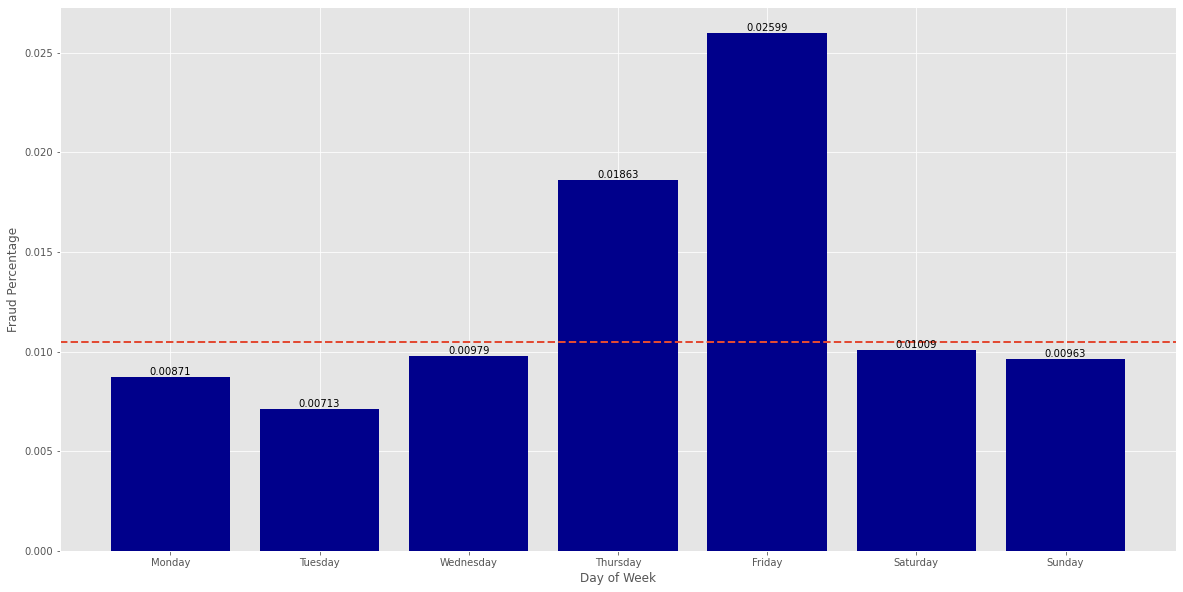

In [99]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(data = y_dow, x=y_dow.index, height = 'Fraud', color = 'darkblue')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Percentage')
#ax.set_ylim(bottom = 0.013)
ax.axhline(y = y_avg, ls = '--', lw = 2)
ax.text(y_dow.index[0], 0.008711+ 0.0001, round(y_dow.Fraud[0],5) , ha='center')
ax.text(y_dow.index[1], 0.007127 + 0.0001, round(y_dow.Fraud[1],5) , ha='center')
ax.text(y_dow.index[2], 0.009788+ 0.0001, round(y_dow.Fraud[2],5) , ha='center')
ax.text(y_dow.index[3], 0.018626+ 0.0001, round(y_dow.Fraud[3],5) , ha='center')
ax.text(y_dow.index[4], 0.025994 + 0.0001, round(y_dow.Fraud[4],5) , ha='center')
ax.text(y_dow.index[5], 0.010095 + 0.0001, round(y_dow.Fraud[5],5) , ha='center')
ax.text(y_dow.index[6], 0.009630 + 0.0001, round(y_dow.Fraud[6],5) ,ha='center')

# Month of the year

In [100]:
data["Date"] = pd.to_datetime(data["Date"])
data["month"] = data["Date"].dt.month

In [101]:
data['month'].dtypes

dtype('int64')

In [102]:
data['month'] = data['month'].astype('O')

In [103]:
data['month'].dtypes

dtype('O')

In [104]:
data['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: object

In [105]:
dict_month={1: 'January',2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August', 9:'September', 10: 'October', 11: 'November', 12 :'December'}

In [106]:
data['Month_name'] = data['month'].map(dict_month)
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW,DOW_Risk,month,Month_name
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994,1,January
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday,0.025994,1,January
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday,0.025994,1,January
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994,1,January
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994,1,January


Text(Sunday, 0.009729999999999999, '0.00963')

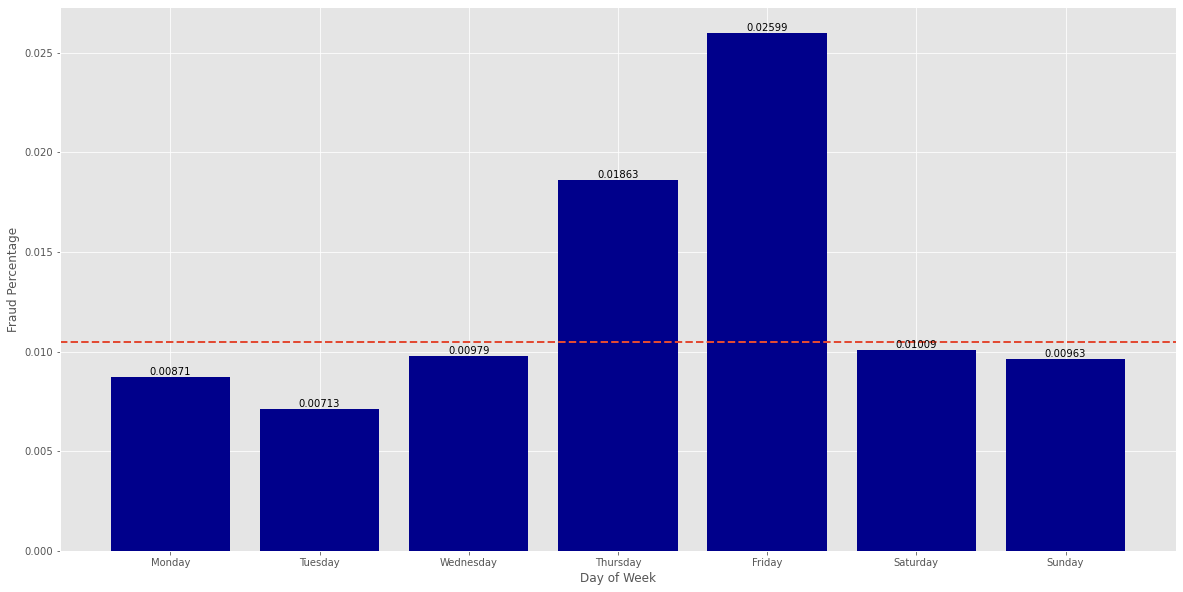

In [107]:
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('DOW')['Fraud'].mean()
num = train_test.groupby('DOW').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num-nmid)/c))
data['DOW_Risk'] = data.DOW.map(y_dow_smooth)
y_avg #the average of all the fraud labels
y_dow = y_dow.reset_index()
y_dow
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['DOW'] = pd.Categorical(y_dow['DOW'], categories = cats, ordered = True)
y_dow = y_dow.sort_values('DOW')
y_dow = y_dow.set_index('DOW')
y_dow
y_dow.index
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(data = y_dow, x=y_dow.index, height = 'Fraud', color = 'darkblue')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Percentage')
#ax.set_ylim(bottom = 0.013)
ax.axhline(y = y_avg, ls = '--', lw = 2)
ax.text(y_dow.index[0], 0.008711+ 0.0001, round(y_dow.Fraud[0],5) , ha='center')
ax.text(y_dow.index[1], 0.007127 + 0.0001, round(y_dow.Fraud[1],5) , ha='center')
ax.text(y_dow.index[2], 0.009788+ 0.0001, round(y_dow.Fraud[2],5) , ha='center')
ax.text(y_dow.index[3], 0.018626+ 0.0001, round(y_dow.Fraud[3],5) , ha='center')
ax.text(y_dow.index[4], 0.025994 + 0.0001, round(y_dow.Fraud[4],5) , ha='center')
ax.text(y_dow.index[5], 0.010095 + 0.0001, round(y_dow.Fraud[5],5) , ha='center')
ax.text(y_dow.index[6], 0.009630 + 0.0001, round(y_dow.Fraud[6],5) ,ha='center')

In [108]:
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('DOW')['Fraud'].mean()
num = train_test.groupby('DOW').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num-nmid)/c))
data['DOW_Risk'] = data.DOW.map(y_dow_smooth)

In [109]:
y_avg #the average of all the fraud labels

0.010479933309515303

In [110]:
y_dow = y_dow.reset_index()
y_dow

,DOW,Fraud
0,Friday,0.025994
1,Monday,0.008711
2,Saturday,0.010095
3,Sunday,0.009630
4,Thursday,0.018626
5,Tuesday,0.007127
6,Wednesday,0.009788


In [111]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['DOW'] = pd.Categorical(y_dow['DOW'], categories = cats, ordered = True)
y_dow = y_dow.sort_values('DOW')
y_dow = y_dow.set_index('DOW')

In [112]:
y_dow

,Fraud
DOW,
Monday,0.008711
Tuesday,0.007127
Wednesday,0.009788
Thursday,0.018626
Friday,0.025994
Saturday,0.010095
Sunday,0.009630


In [113]:
y_dow.index

CategoricalIndex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, dtype='category', name='DOW')

Text(Sunday, 0.009729999999999999, '0.00963')

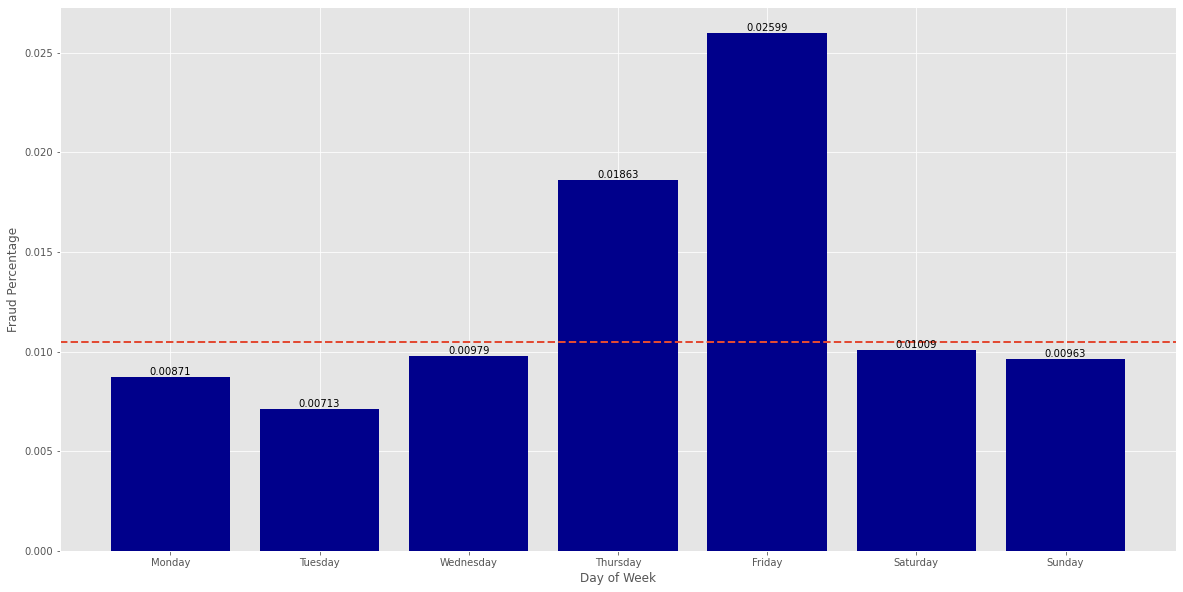

In [114]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(data = y_dow, x=y_dow.index, height = 'Fraud', color = 'darkblue')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Percentage')
#ax.set_ylim(bottom = 0.013)
ax.axhline(y = y_avg, ls = '--', lw = 2)
ax.text(y_dow.index[0], 0.008711+ 0.0001, round(y_dow.Fraud[0],5) , ha='center')
ax.text(y_dow.index[1], 0.007127 + 0.0001, round(y_dow.Fraud[1],5) , ha='center')
ax.text(y_dow.index[2], 0.009788+ 0.0001, round(y_dow.Fraud[2],5) , ha='center')
ax.text(y_dow.index[3], 0.018626+ 0.0001, round(y_dow.Fraud[3],5) , ha='center')
ax.text(y_dow.index[4], 0.025994 + 0.0001, round(y_dow.Fraud[4],5) , ha='center')
ax.text(y_dow.index[5], 0.010095 + 0.0001, round(y_dow.Fraud[5],5) , ha='center')
ax.text(y_dow.index[6], 0.009630 + 0.0001, round(y_dow.Fraud[6],5) ,ha='center')

# Creating Variable

In [115]:
df = data.copy()

In [116]:
start_convert = pd.Timestamp.now()

# Transform the data type of the values to string, enabling the ability to 
# merge specific values together to form variables.


cols = df.columns.difference(['Date', 'Fraud', 'Amount']) # Select all columns except Date, Fraud and Amount
df[cols] = df[cols].astype(str)

print('convert time', pd.Timestamp.now() - start_convert)
df.dtypes

convert time 0 days 00:00:00.150722


Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
DOW                          object
DOW_Risk                     object
month                        object
Month_name                   object
dtype: object

In [117]:
df['card_merch_desc']=df['Cardnum']+ df['Merchnum'] + df['Merch description']
df['card_merchdesc']= df['Cardnum'] + df['Merch description']
df['merchnum_desc']=df['Merchnum'] + df['Merch description']
df['card_merch'] = df['Cardnum'] + df['Merchnum'] 
df['merch_zip']=df['Merchnum'] + df['Merch zip']
df['card_zip'] = df['Cardnum'] + df['Merch zip']

In [118]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW,DOW_Risk,month,Month_name,card_merch_desc,card_merchdesc,merchnum_desc,card_merch,merch_zip,card_zip
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421904395509006296254FEDEX SHP 12/23/09 AB#,5142190439FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#,51421904395509006296254,550900629625438118.0,514219043938118.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday,0.025994362668336986,1,January,514218397361003026333SERVICE MERCHANDISE #81,5142183973SERVICE MERCHANDISE #81,61003026333SERVICE MERCHANDISE #81,514218397361003026333,610030263331803.0,51421839731803.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday,0.025994362668336986,1,January,51421317214503082993600OFFICE DEPOT #191,5142131721OFFICE DEPOT #191,4503082993600OFFICE DEPOT #191,51421317214503082993600,450308299360020706.0,514213172120706.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421484525509006296254FEDEX SHP 12/28/09 AB#,5142148452FEDEX SHP 12/28/09 AB#,5509006296254FEDEX SHP 12/28/09 AB#,51421484525509006296254,550900629625438118.0,514214845238118.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421904395509006296254FEDEX SHP 12/23/09 AB#,5142190439FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#,51421904395509006296254,550900629625438118.0,514219043938118.0


In [119]:
df.shape

(96397, 20)

In [120]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW,DOW_Risk,month,Month_name,card_merch_desc,card_merchdesc,merchnum_desc,card_merch,merch_zip,card_zip
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421904395509006296254FEDEX SHP 12/23/09 AB#,5142190439FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#,51421904395509006296254,550900629625438118.0,514219043938118.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday,0.025994362668336986,1,January,514218397361003026333SERVICE MERCHANDISE #81,5142183973SERVICE MERCHANDISE #81,61003026333SERVICE MERCHANDISE #81,514218397361003026333,610030263331803.0,51421839731803.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday,0.025994362668336986,1,January,51421317214503082993600OFFICE DEPOT #191,5142131721OFFICE DEPOT #191,4503082993600OFFICE DEPOT #191,51421317214503082993600,450308299360020706.0,514213172120706.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421484525509006296254FEDEX SHP 12/28/09 AB#,5142148452FEDEX SHP 12/28/09 AB#,5509006296254FEDEX SHP 12/28/09 AB#,51421484525509006296254,550900629625438118.0,514214845238118.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,0.025994362668336986,1,January,51421904395509006296254FEDEX SHP 12/23/09 AB#,5142190439FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#,51421904395509006296254,550900629625438118.0,514219043938118.0


In [121]:
df1=df.copy()
final=df.copy()
df['check_date']=df1.Date
df['check_record']=df1.Recnum

df.shape

(96397, 22)

In [122]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'DOW',
       'DOW_Risk', 'month', 'Month_name', 'card_merch_desc', 'card_merchdesc',
       'merchnum_desc', 'card_merch', 'merch_zip', 'card_zip', 'check_date',
       'check_record'],
      dtype='object')

In [123]:
attributes=list(df.iloc[:,np.r_[1,3,12,13,14,16,17,18,19]].columns)
attributes

['Cardnum',
 'Merchnum',
 'month',
 'Month_name',
 'card_merch_desc',
 'merchnum_desc',
 'card_merch',
 'merch_zip',
 'card_zip']

In [ ]:
%%time
start=timeit.default_timer()

for entity in attributes:
    try: print(entity,'Run time for this entity---> {}s'.format(timeit.default_timer()-st))
    except: 
        print('')
    st=timeit.default_timer()
    
    
# Day- since variables:

    df_l=df[['Recnum','Date',entity]]
    df_r=df[['check_record','check_date',entity,'Amount']]
    temp=pd.merge(df_l,df_r, left_on=entity,right_on=entity)
    temp1=temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date','check_date']].last()
 


    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since']=final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date-pd.to_datetime('2006-01-01')).dt.days,inplace =True)
    print('\n' + entity + '_day_since --->Done')
    
    
# # Frequency & amount variables:
    
    for time in [0,1,3,7,14,30,60]:
        temp2=temp[(temp.check_date >=(temp.Date -dt.timedelta(time))) & \
                    (temp.Recnum >=temp.check_record)] [['Recnum',entity,'Amount']]
        
        col_name =entity + '_count_' + str(time)
        mapper2 =temp2.groupby('Recnum')[entity].count()
        final[col_name]= final.Recnum.map(mapper2)
        print(col_name + '--> Done')
        final[entity +'_avg_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity +'_max_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity +'_med_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity +'_total_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity +'_actual/avg_'+ str(time)]=final['Amount'] / final[entity +'_avg_'+ str(time)]
        final[entity +'_actual/max_'+ str(time)]=final['Amount'] / final[entity +'_max_'+ str(time)]
        final[entity +'_actual/med_'+ str(time)]=final['Amount'] / final[entity +'_med_'+ str(time)]
        final[entity +'_actual/total_'+ str(time)]=final['Amount'] / final[entity +'_total_'+ str(time)]
        print(entity + 'amount variables over ' + str(time) + '---> Done')
        
        
    del df_l
    del df_r
    del temp
    del temp1
    del temp2
    del mapper2
    
        
print('Total run time :{}mins'.format((timeit.default_timer()-st)/60)) 
    



Cardnum_day_since --->Done
Cardnum_count_0--> Done
Cardnumamount variables over 0---> Done
Cardnum_count_1--> Done
Cardnumamount variables over 1---> Done
Cardnum_count_3--> Done
Cardnumamount variables over 3---> Done
Cardnum_count_7--> Done
Cardnumamount variables over 7---> Done
Cardnum_count_14--> Done
Cardnumamount variables over 14---> Done
Cardnum_count_30--> Done
Cardnumamount variables over 30---> Done
Cardnum_count_60--> Done
Cardnumamount variables over 60---> Done
Merchnum Run time for this entity---> 16.542104541000015s

Merchnum_day_since --->Done
Merchnum_count_0--> Done
Merchnumamount variables over 0---> Done
Merchnum_count_1--> Done
Merchnumamount variables over 1---> Done
Merchnum_count_3--> Done
Merchnumamount variables over 3---> Done
Merchnum_count_7--> Done


<timed exec>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Merchnumamount variables over 7---> Done


<timed exec>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Merchnum_count_14--> Done


<timed exec>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Merchnumamount variables over 14---> Done


<timed exec>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Merchnum_count_30--> Done


<timed exec>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Merchnumamount variables over 30---> Done


<timed exec>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Merchnum_count_60--> Done


<timed exec>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Merchnumamount variables over 60---> Done
month Run time for this entity---> 92.82630391700008s


In [ ]:
print(final.shape)
print('#new variable is',len(final.columns)-numstart)
numstart=len(final.columns)

In [ ]:
%%time
start = timeit.default_timer()

# Velocity change variables
for entity in attributes:
    for d in ['0', '1']:
        for dd in ['7', '14', '30', '60']:
            entity_count_d = final[entity + '_count_' + d]
            entity_count_dd = final[entity + '_count_' + dd]
            entity_total_d = final[entity + '_total_' + d]
            entity_total_dd = final[entity + '_total_' + dd]
            
            final[entity + '_count_' + d + '_by_' + dd] = entity_count_d / entity_count_dd / float(dd)
            final[entity + '_total_amount_' + d + '_by_' + dd] = entity_total_d / entity_total_dd / float(dd)

print('Run time: {}s'.format((timeit.default_timer() - start)))


In [ ]:
print(final.shape)
print('#new variables are',len(final.columns) - numstart)
numstart=len(final.columns)

In [ ]:
final.to_csv('make_var_part_1',index=False)

In [ ]:
final_new=final.copy()

In [ ]:
print(final_new.shape)



In [ ]:
numstart=len(final_new.columns)
numstart

In [ ]:
%%time
start = timeit.default_timer()

for entity in attributes:
    for d in ['0', '1']:
        for dd in ['7', '14', '30', '60']:
            final_new[entity +'_vdratio_'+d] =\
            final_new[entity+'_count_'+d+'_by_'+ dd]/(final[entity+'_day_since']+1)
          

In [ ]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - numstart)
numstart=len(final_new.columns)

In [ ]:
%%time
start = timeit.default_timer()
for entity in attributes:
    for field in attributes:
        st=timeit.default_timer()
        if entity != field:
            new_attributes= f'{entity}_{field}_nunique'
            if new_attributes not in list(final_new.columns):
                mapper3=final_new.groupby(entity)[field].nunique()
                final_new[new_attributes]=final_new[entity].map(mapper3)
        print(f'run time for entity {entity} in field {field}' + '--> Done')
        
print('total run time : {}mins'.format((timeit.default_timer()-start/60)))

In [ ]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - numstart)
numstart=len(final_new.columns)

In [ ]:
df2=data.copy()
df2['check_date']=df2.Date
df2['check_recnum']=df2.Recnum
df_2=df2[['Recnum','Date','Amount','Cardnum','Merchnum']]
df_s=df2[['check_recnum','check_date','Amount','Cardnum','Merchnum']]
temp2=pd.merge(df_2,df_s,left_on='Cardnum',right_on='Cardnum')


groupers=['Cardnum']
for grouper in groupers:
    for d in [0,1]:
        for dd in [3,7,14,30]:
            numerator_df=temp2[(temp2.check_date>=(temp2.Date-dt.timedelta(d)))
                              & (temp2.Recnum>=temp2.check_recnum)]
            
            denominator_df=temp2[(temp2.check_date>=(temp2.Date-dt.timedelta(dd)))
                              & (temp2.Recnum>=temp2.check_recnum)]
            
            
            
            numerator=numerator_df.groupby(grouper)['Recnum'].count()/dd

            denominator=denominator_df.groupby(grouper)['Recnum'].count()/dd
            
            colname='relative_velocity_count_by_'+ grouper +'_'+ str(d) +'_days_over_'+ str(dd)
            final_new[colname]=final_new[grouper].map(numerator)/final_new[grouper].map(denominator)
            

In [ ]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - numstart)
numstart=len(final_new.columns)

In [ ]:
%%time
start=timeit.default_timer()

for entity in attributes:
    try: print(entity,'Run time for this entity---> {}s'.format(timeit.default_timer()-st))
    except: 
        print('')
    st=timeit.default_timer()
    df_l=df1[['Recnum','Date',entity,'Amount']]
    df_r=df1[['check_record','check_date',entity,'Amount']]
    temp=pd.merge(df_l,df_r, left_on=entity,right_on=entity)
    
    
    
    for time in [0,1,3,7,14,30]:
        temp2=temp[(temp.check_date >=(temp.Date - dt.timedelta(time))) & \
                    (temp.Recnum >=temp.check_record)] [['Recnum','check_record',entity,'Amount_x','Amount_y']]
        temp2['Amount_diff']=temp2['Amount_y']-temp2['Amount_x']
        
        
        col_name =entity + '_variability_avg_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].mean()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name+'----> Done')
        
        
        col_name =entity + '_variability_max_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].max()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name + '----> Done')
        
        col_name =entity + '_variability_med_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].median()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name + '----> Done')
        
        
        print(entity + ' amount variable over past ' + str(time) + '---->Done')
        
        
             
    del df_l
    del df_r
    del temp
    del temp2
    
    
        
print('Total run time :{}mins'.format((timeit.default_timer()-st)/60)) 
    

In [ ]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - numstart)
numstart=len(final_new.columns)

In [ ]:
final_new.to_csv('make_var_part_3',index=False)

In [ ]:
len(final_new.columns)

In [ ]:
attributes

# Remove redundant columns

In [ ]:
final_new.set_index('Recnum',inplace=True)

In [ ]:
%%time
print(final_new.shape)
final_new=final_new.T.drop_duplicates().T
final_new.shape

In [ ]:
final_new.columns.values.tolist()

In [ ]:
len(final_new.columns)

In [ ]:
final_vars =final_new.iloc[:,np.r_[8,10,19:len(final_new.columns)]]

In [ ]:
final_vars.head()

In [ ]:
final_vars.shape

In [ ]:
final_vars.to_csv('candidate_vars.csv')

In [ ]:
print('Duration:',pd.datetime.now()-start_time)